In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv("glaucoma.csv")
df.head()

,ag,at,as,an,ai,eag,eat,eas,ean,eai,...,tmt,tms,tmn,tmi,mr,rnf,mdic,emd,mv,Class
0,2.220,0.354,0.580,0.686,0.601,1.267,0.336,0.346,0.255,0.331,...,-0.018,-0.230,-0.510,-0.158,0.841,0.410,0.137,0.239,0.035,normal
1,2.681,0.475,0.672,0.868,0.667,2.053,0.440,0.520,0.639,0.454,...,-0.014,-0.165,-0.317,-0.192,0.924,0.256,0.252,0.329,0.022,normal
2,1.979,0.343,0.508,0.624,0.504,1.200,0.299,0.396,0.259,0.246,...,-0.097,-0.235,-0.337,-0.020,0.795,0.378,0.152,0.250,0.029,normal
3,1.747,0.269,0.476,0.525,0.476,0.612,0.147,0.017,0.044,0.405,...,-0.035,-0.449,-0.217,-0.091,0.746,0.200,0.027,0.078,0.023,normal
4,2.990,0.599,0.686,1.039,0.667,2.513,0.543,0.607,0.871,0.492,...,-0.105,0.084,-0.012,-0.054,0.977,0.193,0.297,0.354,0.034,normal


In [6]:
normal_class = df.loc[df['Class'] == "normal", :]
glaucoma_class = df.loc[df['Class'] == "glaucoma", :]

In [18]:
p_values = []
for i in df.columns:
    if i != "Class":
        x = normal_class[i]
        y = glaucoma_class[i]
        result = stats.ttest_ind(x, y)
        p_values.append(result.pvalue)

[['ag',
  'at',
  'as',
  'an',
  'ai',
  'eag',
  'eat',
  'eas',
  'ean',
  'eai',
  'abrg',
  'abrt',
  'abrs',
  'abrn',
  'abri',
  'hic',
  'mhcg',
  'mhct',
  'mhcs',
  'mhcn',
  'mhci',
  'phcg',
  'phct',
  'phcs',
  'phcn',
  'phci',
  'hvc',
  'vbsg',
  'vbst',
  'vbss',
  'vbsn',
  'vbsi',
  'vasg',
  'vast',
  'vass',
  'vasn',
  'vasi',
  'vbrg',
  'vbrt',
  'vbrs',
  'vbrn',
  'vbri',
  'varg',
  'vart',
  'vars',
  'varn',
  'vari',
  'mdg',
  'mdt',
  'mds',
  'mdn',
  'mdi',
  'tmg',
  'tmt',
  'tms',
  'tmn',
  'tmi',
  'mr',
  'rnf',
  'mdic',
  'emd',
  'mv',
  'Class'],
 [0.9779749799627997,
  0.5843972581079094,
  0.4977819768677054,
  0.7492156206585698,
  0.7460437982465011,
  0.00016480275425987084,
  0.05295023828527575,
  0.007220860226429832,
  1.1194147730057069e-05,
  3.239543370343849e-05,
  4.431678777792731e-09,
  1.8914014639587406e-05,
  9.84146419958773e-09,
  2.3627554622275372e-07,
  1.12629103530322e-11,
  8.599560730647242e-16,
  3.3827486246096

In [25]:
df_ttest = pd.DataFrame({
    "Column Name": list(df.columns[:-1]),
    "p-values": p_values
})
df_ttest.head(20)

,Column Name,p-values
0,ag,9.779750e-01
1,at,5.843973e-01
2,as,4.977820e-01
3,an,7.492156e-01
4,ai,7.460438e-01
5,eag,1.648028e-04
6,eat,5.295024e-02
7,eas,7.220860e-03
8,ean,1.119415e-05
9,eai,3.239543e-05


0 15
['ag', 'at', 'as', 'an', 'ai', 'eag', 'eat', 'eas', 'ean', 'eai', 'abrg', 'abrt', 'abrs', 'abrn', 'abri', 'Class']
15 30
['hic', 'mhcg', 'mhct', 'mhcs', 'mhcn', 'mhci', 'phcg', 'phct', 'phcs', 'phcn', 'phci', 'hvc', 'vbsg', 'vbst', 'vbss', 'Class']
30 45
['vbsn', 'vbsi', 'vasg', 'vast', 'vass', 'vasn', 'vasi', 'vbrg', 'vbrt', 'vbrs', 'vbrn', 'vbri', 'varg', 'vart', 'vars', 'Class']
45 60
['varn', 'vari', 'mdg', 'mdt', 'mds', 'mdn', 'mdi', 'tmg', 'tmt', 'tms', 'tmn', 'tmi', 'mr', 'rnf', 'mdic', 'Class']


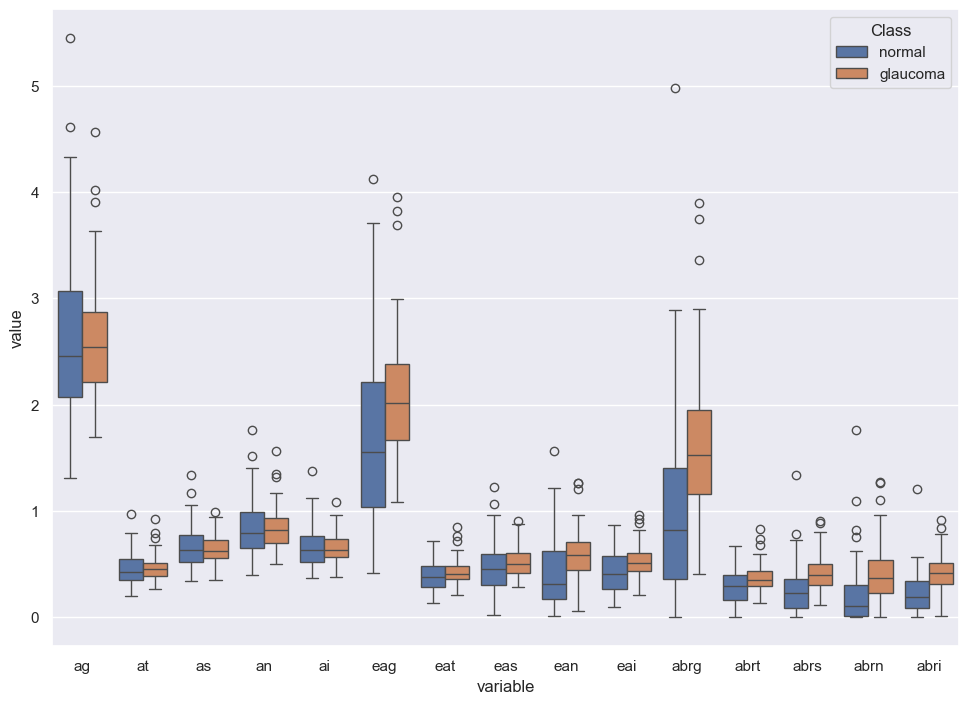

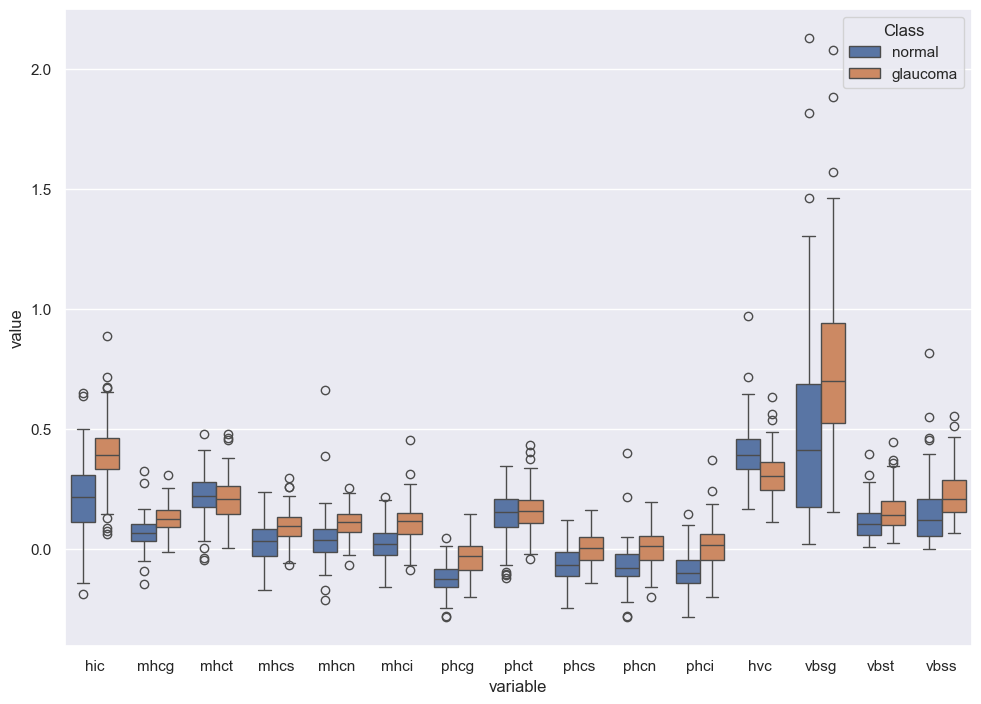

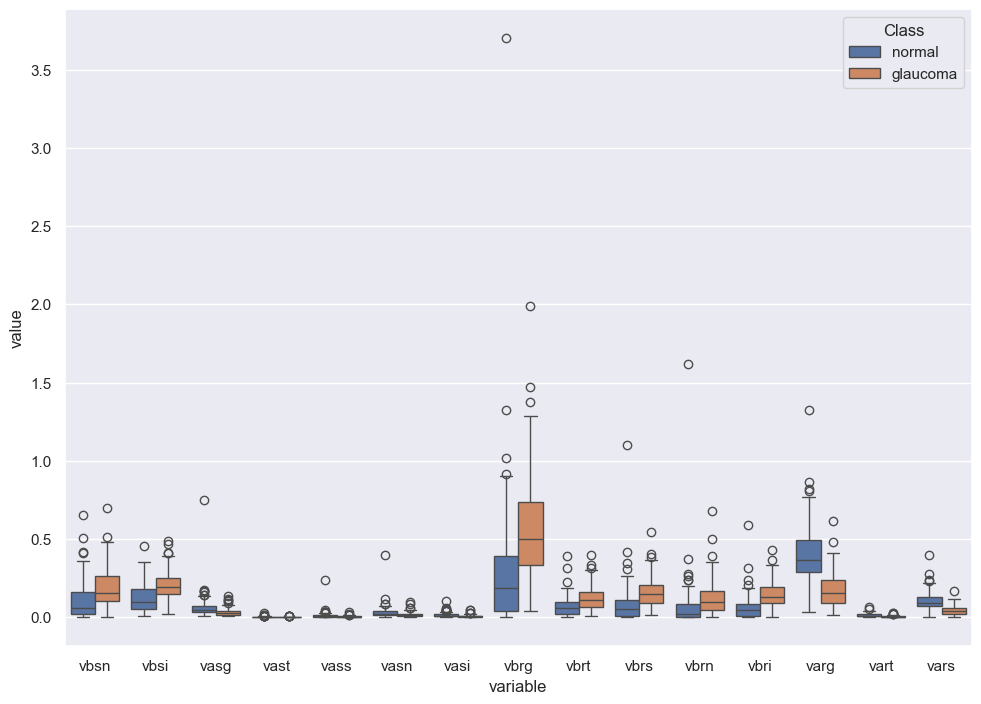

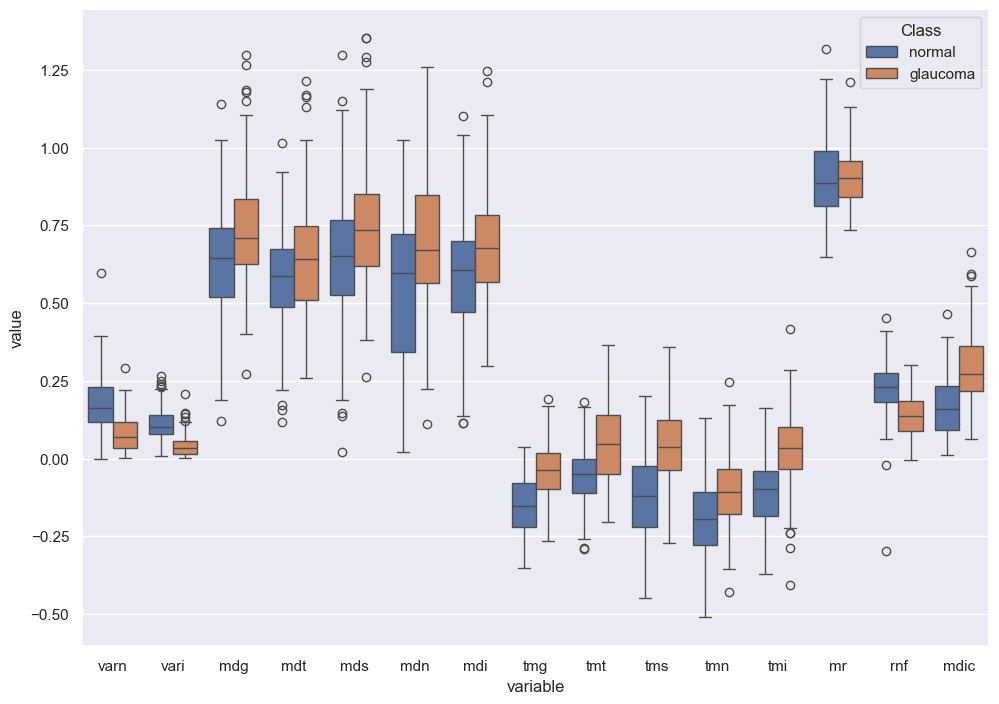

In [76]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

for i in range(4):
    idx1 = (i+1)*15 - 15
    idx2 = (i+1)*15
    cols = list(df.columns[idx1:idx2]) + ["Class"]
    boxplot_data = df.loc[:, cols].melt(id_vars='Class')
    plt.figure(i)
    sns.boxplot(data=boxplot_data, x = "variable", y = "value", hue="Class")

In [92]:
model = tree.DecisionTreeClassifier(
    criterion='gini', 
    min_samples_split=20, 
    min_samples_leaf=round(20.0/3.0), max_depth=30
)
X = df.iloc[:,:62]
y = df.iloc[:,62]
model.fit(X, y)
cross_val_score(model, X, y, cv=5)

array([0.85      , 0.69230769, 0.84615385, 0.69230769, 0.66666667])

[Text(0.4166666666666667, 0.9285714285714286, 'x[42] <= 0.209\ngini = 0.5\nsamples = 196\nvalue = [98, 98]'),
 Text(0.25, 0.7857142857142857, 'x[26] <= 0.368\ngini = 0.145\nsamples = 76\nvalue = [70, 6]'),
 Text(0.16666666666666666, 0.6428571428571429, 'x[59] <= 0.199\ngini = 0.032\nsamples = 62\nvalue = [61, 1]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 55\nvalue = [55, 0]'),
 Text(0.3333333333333333, 0.6428571428571429, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.5833333333333334, 0.7857142857142857, 'x[16] <= 0.17\ngini = 0.358\nsamples = 120\nvalue = [28, 92]'),
 Text(0.5, 0.6428571428571429, 'x[44] <= 0.064\ngini = 0.303\nsamples = 113\nvalue = [21, 92]'),
 Text(0.4166666666666667, 0.5, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.5833333333333334, 0.5, 'x[54] <= -0.065\ngini = 0.207\nsamples = 94\nvalue = [11, 83]'),
 Text(0.4166666666666667, 0.35714285714285715, 'x[50] <= 0.73\ngi

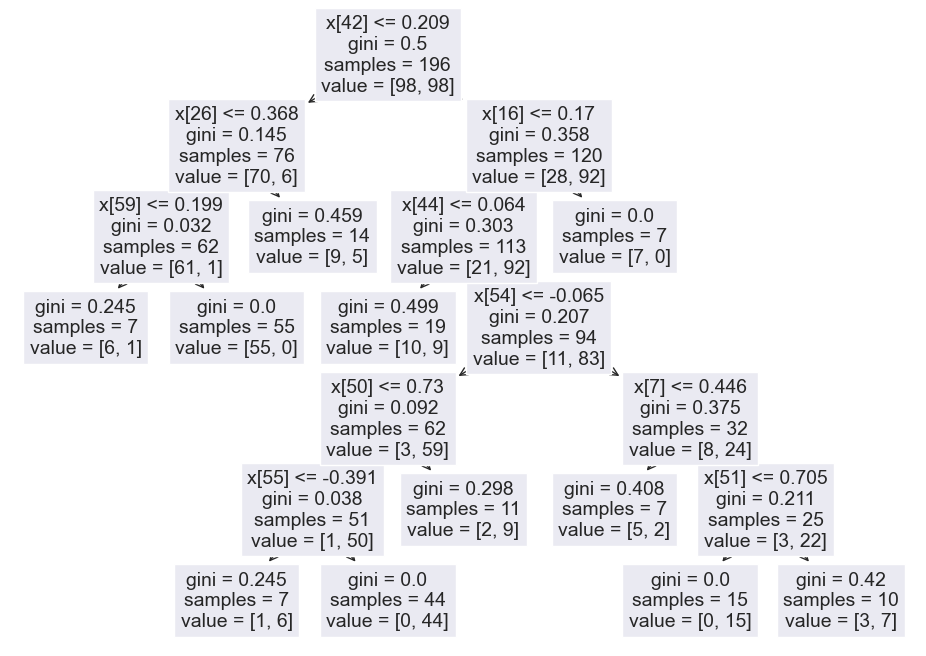

In [90]:
tree.plot_tree(model)

In [97]:
result

TypeError: 'bool' object is not iterable

In [106]:
len(np.where(df["Class"]=="glaucoma")[0])

98

(array([ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
        176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195], dtype=int64),)

In [104]:
len((np.where(results=="glaucoma") and np.where(df["Class"]=="glaucoma"))[0])

98

In [121]:
results = model.predict(X)
glauc_glauc = len([(a, b) for a, b in zip(results, df["Class"]) if a == "glaucoma" and b == "glaucoma"])
glauc_normal = len([(a, b) for a, b in zip(results, df["Class"]) if a == "glaucoma" and b == "normal"])
normal_normal = len([(a, b) for a, b in zip(results, df["Class"]) if a == "normal" and b == "normal"])
normal_glauc = len([(a, b) for a, b in zip(results, df["Class"]) if a == "normal" and b == "glaucoma"])


In [129]:
# Define multi-level row index
row_index = pd.MultiIndex.from_tuples([('Observed', 'Normal'), ('Observed', 'Glaucoma')])

# Define multi-level column index
column_index = pd.MultiIndex.from_tuples([('Predicted', 'Normal'), ('Predicted', 'Glaucoma')])

# Create a DataFrame with the specified indices
data = [
    [81, 17],
    [6, 92],
]

df = pd.DataFrame(data, index=row_index, columns=column_index)
df

Predicted         
                     Normal Glaucoma
Observed Normal          81       17
         Glaucoma         6       92

In [130]:
df.to_latex()

'\\begin{tabular}{llrr}\n\\toprule\n &  & \\multicolumn{2}{r}{Predicted} \\\\\n &  & Normal & Glaucoma \\\\\n\\midrule\n\\multirow[t]{2}{*}{Observed} & Normal & 81 & 17 \\\\\n & Glaucoma & 6 & 92 \\\\\n\\cline{1-4}\n\\bottomrule\n\\end{tabular}\n'

In [134]:
k = 3.0   # Shape parameter (also known as alpha)
theta = 2.0  # Scale parameter

# Define the range [a, b]
a = 2.5359
b = 9.4641

# Calculate the CDF at points a and b
p_a = stats.gamma.cdf(a, a=k, scale=theta)
p_b = stats.gamma.cdf(b, a=k, scale=theta)

# Probability that X falls within the range [a, b]
probability = p_b - p_a
probability

0.7153181810074709

In [135]:
p_b

0.8508897348670021

In [136]:
p_a

0.13557155385953118

In [137]:
2874360 - 2823120

51240

In [138]:
7740000 - 7290000

450000

In [139]:
(2874360 - 2823120)/(7740000 - 7290000)

0.11386666666666667

In [141]:
61.503 + 0.1139*250

89.97800000000001

In [2]:
import numpy as np
import math
results = []
for i in range(7):
    e = 100*(2.68**i)*(np.exp(-2.68))/(math.factorial(i))
    results.append(e)
results

[6.856315415427791,
 18.37492531334648,
 24.622399919884288,
 21.99601059509663,
 14.737327098714742,
 7.899207324911103,
 3.528312605126959]

In [4]:
sum(results)

98.01449827250799

In [5]:
obs = [5,21,21,25,15,8,5]
chi_list = []
for obs, exp in zip(results, obs):
    res = (obs-exp)**2 / exp
    chi_list.append(res)

sum(chi_list)

2.442172329470436

In [6]:
chi_list

[0.6891813843109706,
 0.3281436719290035,
 0.624846722837033,
 0.36095809379086774,
 0.004599803537974334,
 0.0012698954189469948,
 0.4331727576456397]

In [10]:
92.83 - (2.2281*np.sqrt(2.48*(1+(1/12)+(2500/37500))))

89.06721469550547

In [8]:
(2.2281*np.sqrt(2.48*(1+(1/12)+(2500/37500))))

3.762785304494531

In [11]:
data = [3.1, 3.3, 4.5, 2.8, 3.5, 3.5, 3.7, 4.2, 3.9, 3.3]
np.mean(data)

3.5799999999999996

In [16]:
var_ = []
for i in data:
    var_.append((i - np.mean(data))**2)
sum(var_)

2.3560000000000008

In [12]:
np.var(data)

0.2356000000000001

In [17]:
2.3553/4.17

0.5648201438848921

In [18]:
9*.2617

2.3552999999999997

In [19]:
2.355/9

0.26166666666666666

In [23]:
mean_diff = [4.26,-2.08,2.76,0.94,1.11,3.21,7.31,5.25,0.52]
var_ = []
for i in mean_diff:
    var_.append((i - np.mean(mean_diff))**2)
sum(var_)


63.56279999999999

In [28]:
np.sqrt(sum(var_)/8)

2.8187497228381235

In [26]:
sum(mean_diff)

23.279999999999998

In [30]:
2.59/0.94

2.75531914893617

In [24]:
var_

[2.8000444444444446,
 21.77777777777777,
 0.030044444444444447,
 2.7115111111111108,
 2.1805444444444437,
 0.3885444444444447,
 22.30987777777777,
 7.093344444444446,
 4.27111111111111]

In [25]:
np.mean(mean_diff)

2.5866666666666664